# What this file does


Things to check:
    
    1) Methodology for calculating time per resident per day: Sum (Direct nursing staff hours) / Sum (Total Resident Days) 
           
    2) Direct care definition correct? Only RN and LPN, not Aides — should I be adding those too? 
    
    3) Provider type classifications: Do I understand them right? 
    
Cost report nationally — can I replicate this analysis nationwide? Data exists, it's a question of making sure that the state's definitions are the same as the federal database and wrapping my arms around it

# Tools

In [24]:
#tools
import pandas as pd
import numpy as np

In [2]:
#read in CT data for 2020 (release MArch 2021)
df = pd.read_csv('cost_report.csv')

In [10]:
#column peek
list_columns = df.columns
for column in list_columns:
    if "Hrs" in column:
        print(column)

Salaries and Wages Operators Owners Hrs
Salaries and Wages Administrator Hrs
Salaries and Wages Assist Administrator Hrs
Salaries and Wages Other Administrator Hrs
Salaries and Wages Head Dietitian Hrs
Salaries and Wages Food Serv Supervisor Hrs
Salaries and Wages Dietary Workers Hrs
Salaries and Wages Head Housekeeper Hrs
Salaries and Wages Housekeeper Worker Hrs
Salaries and Wages Engineer Hrs
Salaries and Wages Maintenance Worker Hrs
Salaries and Wages Laundry Supervisor Hrs
Salaries and Wages Laundry Worker Hrs
Salaries and Wages Barber Hrs
Salaries and Wages Protective Services Hrs
Salaries and Wages Head Accountant Hrs
Salaries and Wages Other Accountant Hrs
Salaries and Wages Director Nurse Hrs
Salaries and Wages RN Direct Care Hrs
Salaries and Wages RN Admin Hrs
Salaries and Wages LPN Direct Care Hrs
Salaries and Wages LPN Admin Hrs
Salaries and Wages Aides Hrs
Salaries and Wages PT Hrs
Salaries and Wages ST Hrs
Salaries and Wages OT Hrs
Salaries and Wages Recreation Worker Hrs

In [11]:
#denominator selection
for column in list_columns:
    if "Day" in column:
        print(column)

Care Days Other
Total Care Days
Medicaid Reserve Bed Days
Other Reserve Bed Days
Total Resident Days


# Ratio calculation

In [15]:
#per formula above
df['ratio_estimated'] = (df['Salaries and Wages RN Direct Care Hrs']+df['Salaries and Wages LPN Direct Care Hrs'])/df['Total Resident Days']

In [39]:
#with aides
df['ratio_estimated_2'] = (df['Salaries and Wages RN Direct Care Hrs']+df['Salaries and Wages LPN Direct Care Hrs']+df['Salaries and Wages Aides Hrs'])/df['Total Resident Days']

In [45]:
#filter out zeroes and nan values 
df_final = df[(df['ratio_estimated']!=0)&(df['ratio_estimated'].isna()==False)][['Provider Name', 'Provider Type', 'ratio_estimated','ratio_estimated_2']]

In [46]:
df_final['Provider Type'].unique()

array(['CCNH   ', 'ICF-IID', 'RHNS   ', 'RCH    ', 'CDH    ', 'AIDSNF ',
       'SLTC   '], dtype=object)

<AxesSubplot:>

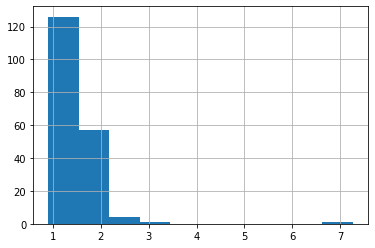

In [48]:
df_final[df_final['Provider Type']=='CCNH   ']['ratio_estimated'].hist()
#df_final[df_final['Provider Type']=='CCNH   ']['ratio_estimated_2'].hist()

<AxesSubplot:>

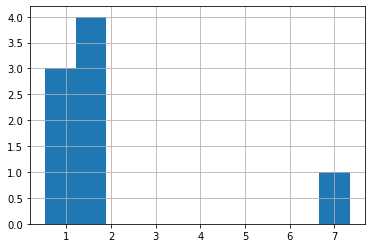

In [37]:
df_final[df_final['Provider Type']=='RHNS   ']['ratio_estimated'].hist()